# Тема “Обучение без учителя” 
## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [52]:
import warnings

warnings.filterwarnings('ignore')

In [53]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [54]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [55]:
data = boston["data"]
data.shape

(506, 13)

In [56]:
feature_names = boston["feature_names"]

feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [57]:
target = boston["target"]

target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [58]:
X = pd.DataFrame(data, columns=feature_names)

In [59]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [61]:
y = pd.DataFrame(target, columns=["price"])

In [62]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [65]:
from sklearn.manifold import TSNE

In [66]:
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [67]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
 

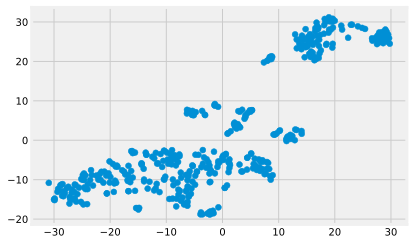

In [74]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show("%notebook")

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [69]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [70]:
labels_train = model.fit_predict(X_train_tsne)


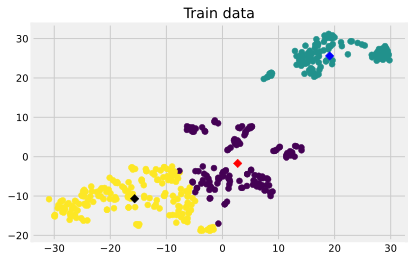

In [73]:
center = model.cluster_centers_
plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1], c=labels_train)
plt.scatter(center[0, 0], center[0, 1], marker='D', color='red')
plt.scatter(center[1, 0], center[1, 1], marker='D', color='blue')
plt.scatter(center[2, 0], center[2, 1], marker='D', color='black')
plt.title('Train data')
plt.show("%notebook")

In [71]:
print('Средние значения price:')
print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))


Средние значения price:
Кластер 0: price    20.470769
dtype: float64
Кластер 1: price    16.277228
dtype: float64
Кластер 2: price    28.350289
dtype: float64
Средние значения CRIM:
Кластер 0: 0.7839846153846154
Кластер 1: 13.17982178217822
Кластер 2: 0.14454537572254336


## Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [39]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [41]:
labels_test = model.fit_predict(X_test_scaled)

In [43]:
labels_test

array([1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1])

In [72]:
print('Средние значения price:')
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))
print()

print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: price    33.871429
dtype: float64
Кластер 1: price    21.55283
dtype: float64
Кластер 2: price    16.437143
dtype: float64

Средние значения CRIM:
Кластер 0: 0.08618571428571427
Кластер 1: 0.25200716981132076
Кластер 2: 10.165531142857143
